In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

from baseline.utils import make_rdkit_mol, get_fingerprint

In [2]:
df = pd.read_csv("../data/biogen_solubility.csv")
df

,Internal ID,Vendor ID,SMILES,logS
0,Mol1,317714313,CNc1cc(Nc2cccn(-c3ccccn3)c2=O)nn2c(C(=O)N[C@@H...,-5.548020
1,Mol2,324056965,CCOc1cc2nn(CCC(C)(C)O)cc2cc1NC(=O)c1cccc(C(F)F)n1,-5.071409
2,Mol4,194963090,CC(C)(Oc1ccc(-c2cnc(N)c(-c3ccc(Cl)cc3)c2)cc1)C...,-3.925969
3,Mol6,316230505,CC#CC(=O)N[C@H]1CCCN(c2c(F)cc(C(N)=O)c3[nH]c(C...,-4.535280
4,Mol9,EN300-97039,C=CC(=O)N1CCC[C@@H](n2nc(-c3ccc(Oc4ccccc4)cc3)...,-4.709963
...,...,...,...,...
2168,Mol3493,36272797,Cc1cc(C)cc(C(=O)NCCCNc2ncccn2)c1,-3.733424
2169,Mol3494,48313392,CCc1noc(COc2c(C)ccnc2Cl)n1,-4.037319
2170,Mol3495,37024444,CC(C)(C)Cc1nnc(-c2cnc3onc(C4CCCC4)c3c2)o1,-4.912777
2171,Mol3496,419556,Cc1nonc1C(=O)NCCc1c[nH]c2cccc(C3(O)CCOCC3)c12,-3.781930


In [3]:
df["mol"] = df["SMILES"].apply(make_rdkit_mol)

In [4]:
df["fingerprint"] = df["mol"].apply(
    lambda x: get_fingerprint(
        x, method="morgan", count_based=True, radius=3, fpSize=2048
    )
)

In [32]:
X = np.vstack(df["fingerprint"].values)

In [33]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [34]:
pca = PCA()
pca.fit(X)

PCA()

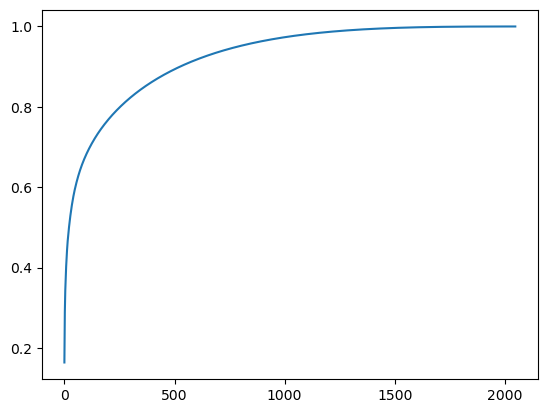

In [35]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [37]:
pca = PCA(0.8)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(2173, 255)


In [43]:
n_clusterss = list(range(2, 50))
inertias = []
kmeanss = []

for n_clusters in n_clusterss:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X_pca)
    kmeanss.append(kmeans)
    inertias.append(kmeans.inertia_)

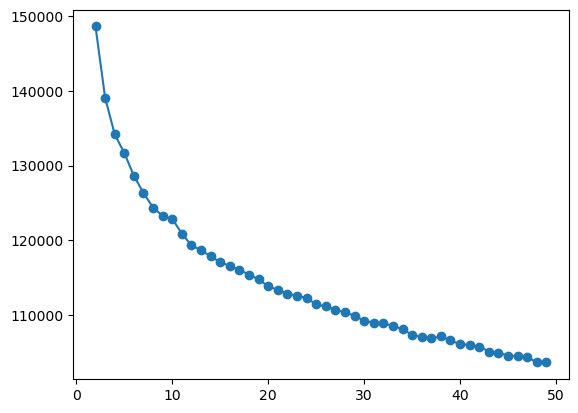

In [44]:
plt.figure()
plt.plot(n_clusterss, inertias, marker="o")

In [45]:
n_clusters = 15
kmeans = kmeanss[n_clusterss.index(n_clusters)]

In [47]:
df["cluster"] = kmeans.labels_
df["cluster"].value_counts()

cluster
2     250
5     224
1     186
10    180
6     173
9     156
4     154
14    150
0     134
3     124
12    121
11    101
8      92
13     91
7      37
Name: count, dtype: int64